In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.4.3
numpy 1.20.3
pandas 1.3.4
sklearn 0.24.2
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [6]:
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

4422102/4422102 [==============================] - 3s 1us/step
(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [7]:
print(type(x_train))

<class 'numpy.ndarray'>


In [8]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.colorbar()
    plt.show()
    

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44 127 182 185 161 120  55
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  42 198 251 255 251 249 247 255 252
  214 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 233 252 237 239 234 237 235 237 237
  254 227   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0  16 210 225 215 175 217 216 193 196 226
  221 209  50   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 199 229 232 230 245 204 219 253 245 207 194
  223 231 236 235   0   0   3   0   0   0]
 [  0   0   0   0   1   0 137 235 204 209 201 209 234 190 234 218 215 238
  239 204 189 224 154   0   0   0   0   0]
 [  0   0   0   0   0   0 194 201 200 209 202 193 205 194 183 218 231 197
  172 181 193 205 199   0   0   0   0   0]
 [  0   0   0   0   0   3 212 203 188 189 196 198 198 201 196 21

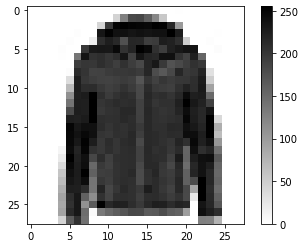

In [9]:
print(x_train[0])
show_single_image(x_train[0])

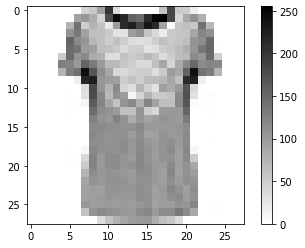

In [10]:
show_single_image(x_train[1])

In [12]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data)==len(y_data)
    assert n_rows*n_cols<len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index=n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
            
            

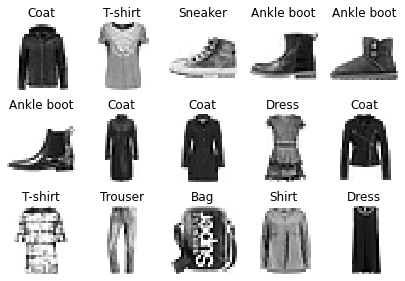

In [13]:
class_names=['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3,5,x_train,y_train,class_names)

In [14]:
tf.keras.models.Sequential()

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
print(model.output.shape)

(None, 784)


In [16]:
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])
model.layers

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[-0.05643701,  0.06869526, -0.06090026, ...,  0.04143918,
         -0.00022522,  0.0018408 ],
        [-0.01361173,  0.04341464,  0.07269457, ...,  0.06063764,
         -0.06199852, -0.02631827],
        [-0.0334201 ,  0.04481   , -0.05806792, ...,  0.04822761,
          0.04010144,  0.01919732],
        ...,
        [-0.03465187,  0.02058978,  0.04164493, ..., -0.03175801,
         -0.04293377, -0.01668572],
        [ 0.00087432,  0.03815623, -0.02094629, ..., -0.0305095 ,
         -0.0492199 ,  0.0189482 ],
        [ 0.00465711,  0.06438839,  0.051856  , ..., -0.06959593,
          0.04375515, -0.05069491]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [19]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))
type(history)

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 2.2180 - accuracy: 0.7141 - val_loss: 0.6882 - val_accuracy: 0.7580
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5864 - accuracy: 0.7817 - val_loss: 0.5782 - val_accuracy: 0.7930
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5085 - accuracy: 0.8111 - val_loss: 0.5064 - val_accuracy: 0.8262
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4582 - accuracy: 0.8313 - val_loss: 0.4970 - val_accuracy: 0.8258
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4277 - accuracy: 0.8410 - val_loss: 0.4799 - val_accuracy: 0.8340
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4064 - accuracy: 0.8495 - val_loss: 0.4668 - val_accuracy: 0.8360
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3905 - accuracy: 0.8546 - val_loss: 0.4438 - val_accuracy:

keras.callbacks.History

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

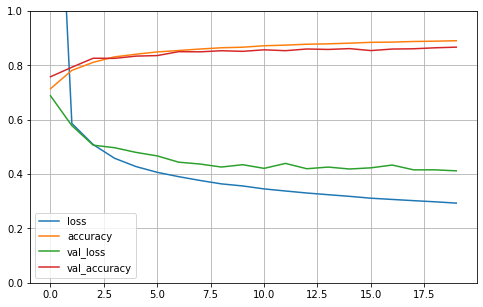

In [23]:
plot_learning_curves(history)

In [24]:
#损失和准确率
model.evaluate(x_test,y_test,verbose=0)

[0.44468700885772705, 0.8532999753952026]

In [25]:
x_train.reshape(-1,1).shape

(43120000, 1)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.fit_transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
print(np.max(x_test_scaled),np.min(x_test_scaled))

2.0234432 -0.81388575


Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9160 - accuracy: 0.7009 - val_loss: 0.6256 - val_accuracy: 0.7898
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5826 - accuracy: 0.7979 - val_loss: 0.5278 - val_accuracy: 0.8152
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5158 - accuracy: 0.8192 - val_loss: 0.4828 - val_accuracy: 0.8320
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4795 - accuracy: 0.8313 - val_loss: 0.4575 - val_accuracy: 0.8434
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4552 - accuracy: 0.8404 - val_loss: 0.4380 - val_accuracy: 0.8534
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4372 - accuracy: 0.8459 - val_loss: 0.4233 - val_accuracy: 0.8580
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4229 - accuracy: 0.8509 - val_loss: 0.4125 - val_accurac

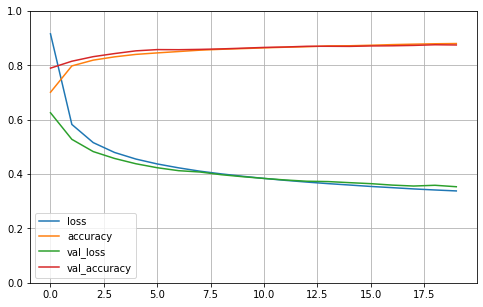

In [28]:
modelstd=keras.models.Sequential()
modelstd.add(keras.layers.Flatten(input_shape=[28,28]))
modelstd.add(keras.layers.Dense(300,activation='relu'))
modelstd.add(keras.layers.Dense(100,activation='relu'))
modelstd.add(keras.layers.Dense(10,activation='softmax'))
modelstd.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])
historystd=modelstd.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_valid_scaled,y_valid))
plot_learning_curves(historystd)

In [29]:
modelstd.evaluate(x_test_scaled,y_test,verbose=0)

[0.39230111241340637, 0.8597000241279602]

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.9109 - accuracy: 0.7003 - val_loss: 0.6245 - val_accuracy: 0.7842
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5876 - accuracy: 0.7941 - val_loss: 0.5312 - val_accuracy: 0.8156
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5206 - accuracy: 0.8162 - val_loss: 0.4897 - val_accuracy: 0.8282
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4838 - accuracy: 0.8290 - val_loss: 0.4644 - val_accuracy: 0.8370
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4595 - accuracy: 0.8373 - val_loss: 0.4461 - val_accuracy: 0.8458
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4408 - accuracy: 0.8442 - val_loss: 0.4326 - val_accuracy: 0.8480
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4264 - accuracy: 0.8503 - val_loss: 0.4212 - val_accuracy:

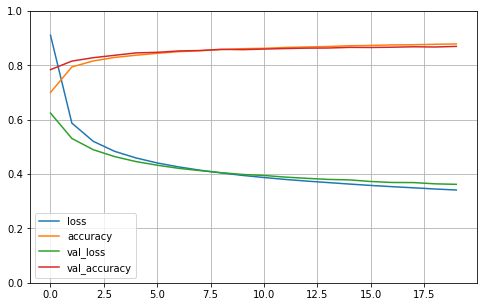

In [33]:
logdir='./callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file=os.path.join(logdir,'fashion_mnist_model.h5')
callbacks=[keras.callbacks.TensorBoard(logdir),keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
           keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
model_callback=keras.models.Sequential()
model_callback.add(keras.layers.Flatten(input_shape=[28,28]))
model_callback.add(keras.layers.Dense(300,activation='relu'))
model_callback.add(keras.layers.Dense(100,activation='relu'))
model_callback.add(keras.layers.Dense(10,activation='softmax'))
model_callback.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])
history_callback=model_callback.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_valid_scaled,y_valid),callbacks=callbacks)
plot_learning_curves(history_callback)

In [34]:
model_callback.evaluate(x_test_scaled,y_test,verbose=0)

[0.3912116289138794, 0.859000027179718]